# AI Connections to Linear Algebra
This notebook demonstrates how linear independence, basis, and dimension concepts connect to Artificial Intelligence (AI) using Python code examples.

## 1. Linear Dependence in Features
If two features are linearly dependent, they carry redundant information, which does not improve a model.

In [17]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Create data
np.random.seed(0)
X1 = np.random.rand(100, 1)  # independent feature
X2 = np.random.randn(100, 1)  # independent feature
X3 = 2 * X1 + 3 * X2          # dependent feature (perfectly correlated)
y = 3 * X1.squeeze() + 6 * X2.squeeze() + np.random.randn(100) * 0.1

# Train models
reg1 = LinearRegression().fit(np.hstack([X1, X2]), y)    # with one feature
reg2 = LinearRegression().fit(np.hstack([X1, X2, X3]), y)  # with redundant feature


print("R^2 with two features:", reg1.score(np.hstack([X1, X2]), y))
print("R^2 with redundant features (full):", reg2.score(np.hstack([X1, X2, X3]), y))


R^2 with two features: 0.999740798192029
R^2 with redundant features (full): 0.999740798192029


## 2. Basis & PCA for Dimensionality Reduction
PCA finds a new orthogonal basis that captures maximum variance in the data.

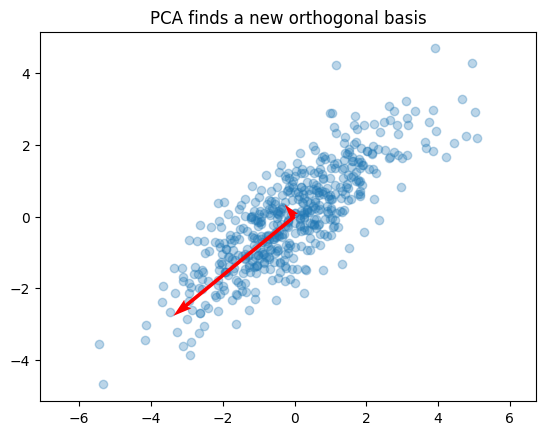

In [2]:

from sklearn.decomposition import PCA

# Create 2D correlated data
np.random.seed(1)
X = np.random.multivariate_normal([0, 0], [[3, 2], [2, 2]], size=500)

# Apply PCA
pca = PCA(n_components=2).fit(X)
X_pca = pca.transform(X)

# Plot
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
for length, vector in zip(pca.explained_variance_, pca.components_):
    plt.quiver(0, 0, vector[0]*length, vector[1]*length, 
               angles='xy', scale_units='xy', scale=1, color='red')
plt.title("PCA finds a new orthogonal basis")
plt.axis("equal")
plt.show()


## 3. Infinite-Dimensional Spaces: Kernel Trick
Kernel methods (e.g., SVM with RBF kernel) operate in infinite-dimensional spaces implicitly, while computations remain finite.

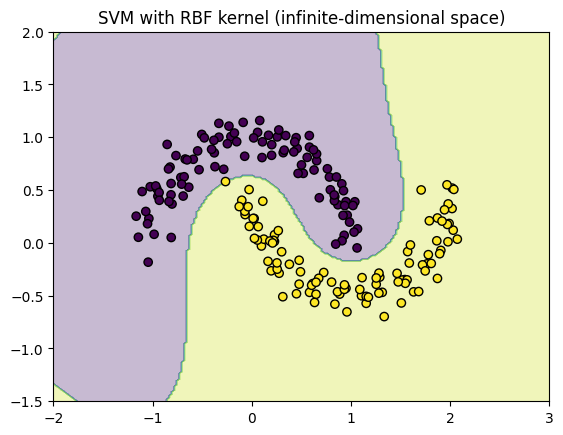

In [4]:

from sklearn.svm import SVC
from sklearn.datasets import make_moons

# Generate dataset
X, y = make_moons(n_samples=200, noise=0.1, random_state=0)

# Train SVM with RBF kernel (infinite-dimensional space)
clf = SVC(kernel='rbf', C=10).fit(X, y)

# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(-2, 3, 200), np.linspace(-1.5, 2, 200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.title("SVM with RBF kernel (infinite-dimensional space)")
plt.show()
